```
Final Project 2 - Logistic Regression dan SVM

Anggota Kelompok:
Sephia Ummiyatil A - PYTN-KS09-005
Naufal Afif S - PYTN-KS09-015
Berliana Putri B - PYTN-KS09-025

Link Deploy:
https://fp2-classifier.herokuapp.com/
```

### Latar Belakang

**Dataset**

Dataset yang digunakan dalam pembuatan model bersumber dari https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

Dataset ini berisikan 23 feature dari catatan curah hujan di negara Australia

**Objective yang ingin dicapai**

* Melakukan klasifikasi curah hujan di Australia
* Mengetahui akurasi yang optimal untuk memprediksi curah hujan yang kemungkinan terjadi besok

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

import pickle

### Data Loading

In [2]:
df = pd.read_csv('dataset/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Dataset memiliki tipe data float dan object. Selain itu juga terdapat missing value pada dataset karena banyaknya nilai non-null pada beberapa atribut tidak sesuai dengan banyaknya data entri.

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
for col in df.columns:
    print(col, ':', df[col].nunique())

Date : 3436
Location : 49
MinTemp : 389
MaxTemp : 505
Rainfall : 681
Evaporation : 358
Sunshine : 145
WindGustDir : 16
WindGustSpeed : 67
WindDir9am : 16
WindDir3pm : 16
WindSpeed9am : 43
WindSpeed3pm : 44
Humidity9am : 101
Humidity3pm : 101
Pressure9am : 546
Pressure3pm : 549
Cloud9am : 10
Cloud3pm : 10
Temp9am : 441
Temp3pm : 502
RainToday : 2
RainTomorrow : 2


In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Terdapat missing value pada setiap atribut kecuali Date dan Location. Oleh karena itu, perlu adanya penanganan terhadap missing value tersebut.

In [7]:
missing_value = df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %').sort_values(ascending=True)
missing_value

Date               0.0 %
Location           0.0 %
MaxTemp           0.87 %
MinTemp           1.02 %
Temp9am           1.21 %
WindSpeed9am      1.21 %
Humidity9am       1.82 %
Pressure3pm      10.33 %
Pressure9am      10.36 %
WindSpeed3pm      2.11 %
Rainfall          2.24 %
RainToday         2.24 %
RainTomorrow      2.25 %
Temp3pm           2.48 %
WindDir3pm        2.91 %
Humidity3pm        3.1 %
Cloud9am         38.42 %
Cloud3pm         40.81 %
Evaporation      43.17 %
Sunshine         48.01 %
WindGustSpeed     7.06 %
WindGustDir        7.1 %
WindDir9am        7.26 %
dtype: object

### Data Cleaning

In [8]:
df.duplicated().sum()

0

Tidak terdapat duplikasi data

**Drop Features yang tidak digunakan dalam membuat Model**

In [9]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [10]:
# Menghapus kolom yang tidak digunakan dalam model
df = df.drop(df.columns[9:21], axis=1, inplace=False)

**Penanganan Missing Value**

In [11]:
# Menghapus semua baris yang miliki nilai null
df = df.dropna(axis=0, inplace=False)

In [12]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
RainToday        0
RainTomorrow     0
dtype: int64

In [13]:
df.shape

(65961, 11)

Pengecekan jumlah baris dan kolom yang tersisa

### Data Exploration

In [14]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed
count,65961.000000,65961.000000,65961.000000,65961.000000,65961.000000,65961.000000
mean,12.977949,23.783374,2.066476,5.338458,7.639407,40.574582
std,6.421768,7.020347,6.767103,3.716701,3.776985,13.450874
min,-6.900000,4.100000,0.000000,0.000000,0.000000,9.000000
25%,8.200000,18.200000,0.000000,2.600000,4.900000,31.000000
50%,12.600000,23.300000,0.000000,4.800000,8.500000,39.000000
75%,17.800000,29.200000,0.600000,7.200000,10.700000,48.000000
max,33.900000,48.100000,206.200000,81.200000,14.500000,135.000000


In [15]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed
MinTemp,1.000000,0.746784,0.109901,0.519689,0.082987,0.137476
MaxTemp,0.746784,1.000000,-0.073583,0.653639,0.470129,0.053503
Rainfall,0.109901,-0.073583,1.000000,-0.074668,-0.238855,0.109142
Evaporation,0.519689,0.653639,-0.074668,1.000000,0.370629,0.217736
Sunshine,0.082987,0.470129,-0.238855,0.370629,1.000000,-0.034357
WindGustSpeed,0.137476,0.053503,0.109142,0.217736,-0.034357,1.000000


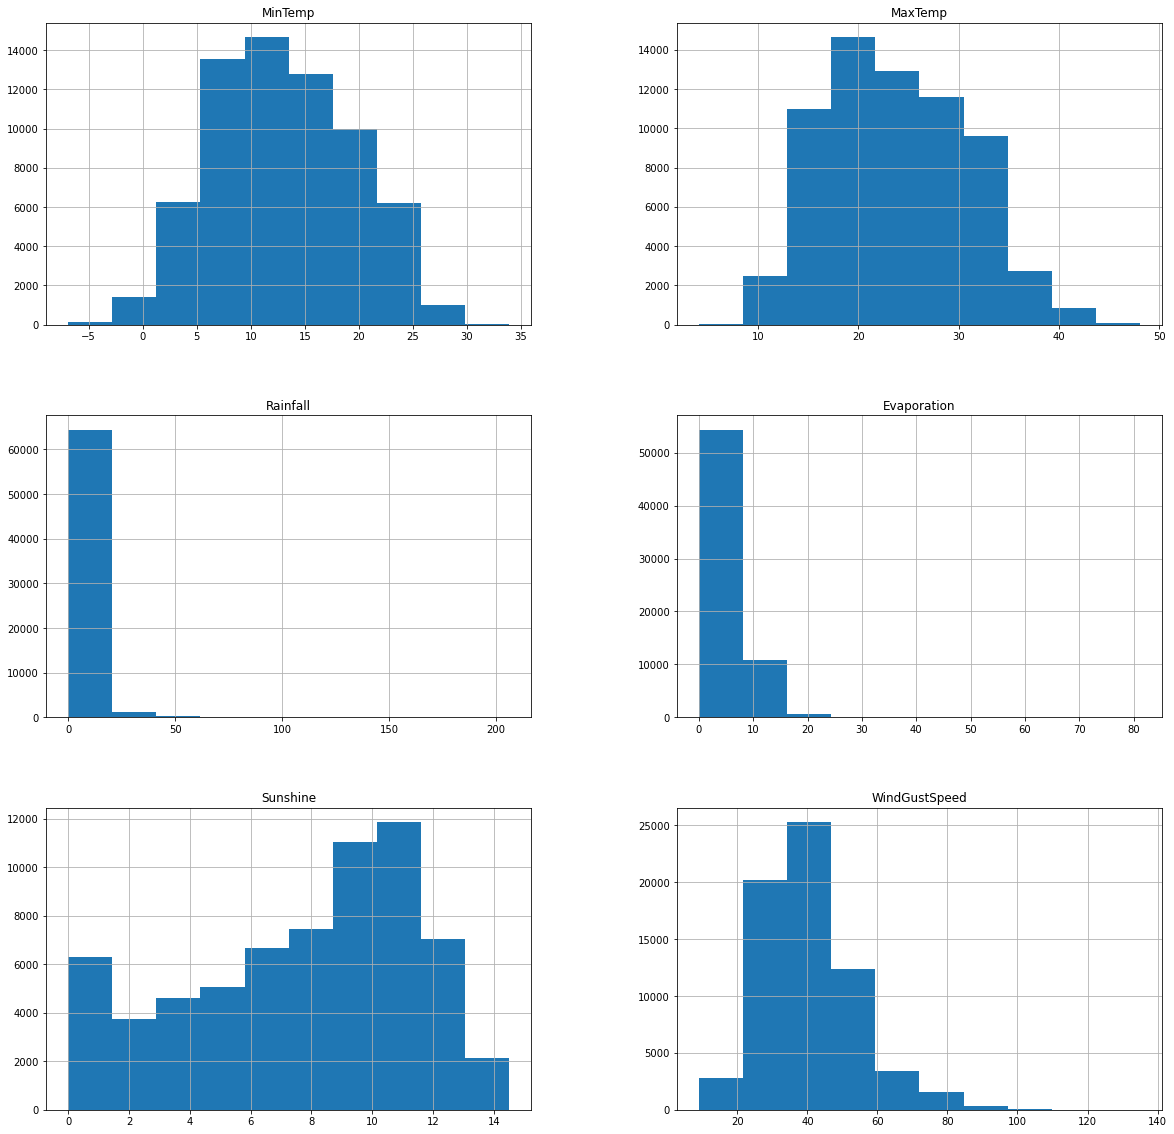

In [16]:
df.hist(bins=10, figsize=(20, 20))
plt.show()

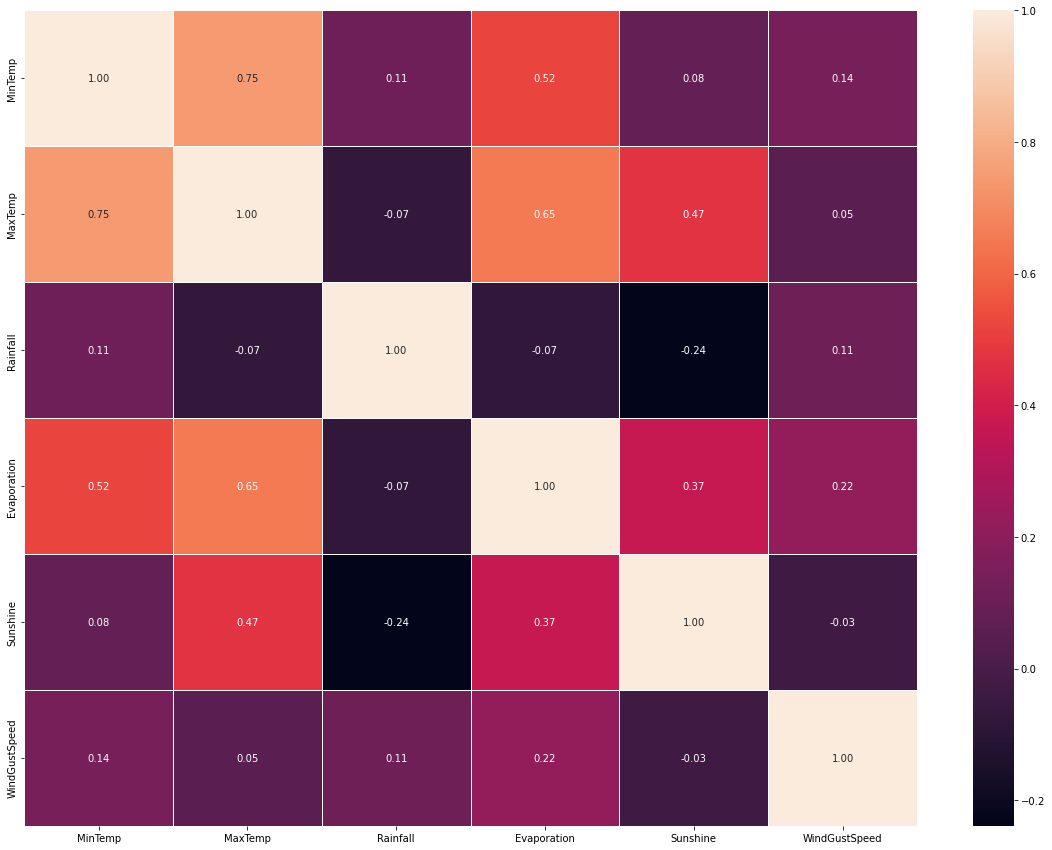

In [17]:
fig, ax = plt.subplots(figsize=(20, 15))
cm = sns.heatmap(df.corr(), linewidths = .5, annot=True, fmt='.2f')

### Data Preprocessing

**Label Encode**

Melakukan konversi pada data feature yang bertipe object agar berubah menjadi numeric unique

In [18]:
labelEncoder = LabelEncoder()

In [19]:
df['Location'] = labelEncoder.fit_transform(df['Location'])
for i, item in enumerate(labelEncoder.classes_):
    print(item, "--->", i)

Adelaide ---> 0
AliceSprings ---> 1
Brisbane ---> 2
Cairns ---> 3
Canberra ---> 4
Cobar ---> 5
CoffsHarbour ---> 6
Dartmoor ---> 7
Darwin ---> 8
Hobart ---> 9
Melbourne ---> 10
MelbourneAirport ---> 11
Mildura ---> 12
Moree ---> 13
MountGambier ---> 14
NorfolkIsland ---> 15
Nuriootpa ---> 16
Perth ---> 17
PerthAirport ---> 18
Portland ---> 19
Sale ---> 20
Sydney ---> 21
SydneyAirport ---> 22
Townsville ---> 23
WaggaWagga ---> 24
Watsonia ---> 25
Williamtown ---> 26
Woomera ---> 27


In [20]:
df['WindGustDir'] = labelEncoder.fit_transform(df['WindGustDir'])
for i, item in enumerate(labelEncoder.classes_):
    print(item, "--->", i)

E ---> 0
ENE ---> 1
ESE ---> 2
N ---> 3
NE ---> 4
NNE ---> 5
NNW ---> 6
NW ---> 7
S ---> 8
SE ---> 9
SSE ---> 10
SSW ---> 11
SW ---> 12
W ---> 13
WNW ---> 14
WSW ---> 15


In [21]:
print('RainToday')
df['RainToday'] = labelEncoder.fit_transform(df['RainToday'])
for i, item in enumerate(labelEncoder.classes_):
    print(item, "--->", i)

print('\nRainTomorrow')
df['RainTomorrow'] = labelEncoder.fit_transform(df['RainTomorrow'])
for i, item in enumerate(labelEncoder.classes_):
    print(item, "--->", i)

RainToday
No ---> 0
Yes ---> 1

RainTomorrow
No ---> 0
Yes ---> 1


df['WindGustDir'] = df['WindGustDir'].map({
    'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8,
    'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15
})

In [22]:
# Memisahkan feature independent dan dependent
X = df.drop(['Date', 'RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [23]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,RainToday
6049,5,17.9,35.2,0.0,12.0,12.3,11,48.0,0
6050,5,18.4,28.9,0.0,14.8,13.0,8,37.0,0
6051,5,15.5,34.1,0.0,12.6,13.3,9,30.0,0
6052,5,19.4,37.6,0.0,10.8,10.6,5,46.0,0
6053,5,21.9,38.4,0.0,11.4,12.2,14,31.0,0


**Normalize Data**

In [24]:
# Melakukan penskalaan data
# sc = StandardScaler()
# sc_X = sc.fit_transform(X)

# Melakukan normalisasi data
norm_X = normalize(X)

In [25]:
feat_cols = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'RainToday']
X = pd.DataFrame(norm_X, columns=feat_cols)
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,RainToday
0,0.076207,0.272822,0.536499,0.0,0.182898,0.187470,0.167656,0.731590,0.0
1,0.090987,0.334833,0.525906,0.0,0.269322,0.236567,0.145579,0.673305,0.0
2,0.095438,0.295858,0.650888,0.0,0.240504,0.253865,0.171789,0.572629,0.0
3,0.077289,0.299880,0.581211,0.0,0.166944,0.163852,0.077289,0.711056,0.0
4,0.085561,0.374758,0.657110,0.0,0.195079,0.208769,0.239571,0.530479,0.0


**Data Split**

In [26]:
# Memisahkan data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Model Defining

**Logistic Regression**

In [27]:
modelLR = LogisticRegression(solver='sag', max_iter=50)

**Support Vector Machine**

In [28]:
modelSVM = svm.SVC(kernel='linear')

### Model Training

**Logistic Regression**

In [29]:
modelLR.fit(X_train, y_train)

LogisticRegression(max_iter=50, solver='sag')

**Support Vector Machine**

In [30]:
modelSVM.fit(X_train, y_train)

SVC(kernel='linear')

### Model Evaluation

**Logistic Regression**

In [31]:
predLR = modelLR.predict(X_test)
accurLR = accuracy_score(y_test, predLR)
mseLR = mean_squared_error(predLR, y_test)
rmseLR = np.sqrt(mean_squared_error(predLR, y_test))
matrixLR = confusion_matrix(y_test, predLR)

print(matrixLR)

[[9618  655]
 [1729 1191]]


**Support Vector Machine**

In [32]:
predSVM = modelSVM.predict(X_test)
accurSVM = accuracy_score(y_test, predSVM)
mseSVM = mean_squared_error(predSVM, y_test)
rmseSVM = np.sqrt(mean_squared_error(predSVM, y_test))
matrixSVM = confusion_matrix(y_test, predSVM)

print(matrixSVM)

[[9865  408]
 [1964  956]]


**Comparison**

In [33]:
modelSlc = pd.DataFrame(data={'Logistic Regression': [accurLR, mseLR, rmseLR],
                              'Support Vector Machine': [accurSVM, mseSVM, rmseSVM]},
                       index=['Accuracy Score', 'MSE Score', 'RMSE Score'])
modelSlc

,Logistic Regression,Support Vector Machine
Accuracy Score,0.819298,0.820208
MSE Score,0.180702,0.179792
RMSE Score,0.425090,0.424019


### Model Inference

In [34]:
X_inf = pd.DataFrame(data={'Location': [1, 2], 'MinTemp': [13.4, 12.5],
                           'MaxTemp': [22.9, 16.7], 'Rainfall': [0.6, 0.2], 
                           'Evaporation': [8.0, 2.0], 'Sunshine': [8.0, 0.3],
                           'WindGustDir': [13, 14], 'WindGustSpeed': [44.0, 37.0],
                           'RainToday': [0, 0]})
X_inf

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,RainToday
0,1,13.4,22.9,0.6,8.0,8.0,13,44.0,0
1,2,12.5,16.7,0.2,2.0,0.3,14,37.0,0


In [35]:
X_inf = normalize(X_inf)

In [36]:
feat_cols = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'RainToday']
X_inf = pd.DataFrame(X_inf, columns=feat_cols)
X_inf

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,RainToday
0,0.018448,0.247203,0.422460,0.011069,0.147584,0.147584,0.239824,0.811713,0.0
1,0.044629,0.278932,0.372654,0.004463,0.044629,0.006694,0.312404,0.825640,0.0


In [37]:
modelLR.predict(X_inf.iloc[0:2])

array([0, 1])

In [38]:
modelSVM.predict(X_inf)

array([0, 1])

### Conclusions

Dari hasil yang telah didapatkan dari analisis di atas, diperoleh kesimpulan bahwa model Support Vector Machine memiliki tingkat error yang lebih sedikit dibandingkan dengan model Logistic Regression. Namun, jika dilihat dari kecepatan komputasi model Logistic Regression lebih cepat dibandingkan dengan model Support Vector Machine dalam waktu eksekusi model train maupun test.

**Save Model**

In [39]:
# Save trained model Logistic Regression
pickle.dump(modelLR, open('model_classifier.pkl', 'wb'))